<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

In [9]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [24]:
import numpy as np

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [4]:
# Write your code here
print(df.columns)
print(df.dtypes)
na = df.isna()
na

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,True,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
65433,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
65434,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
65435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [5]:
# Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [12]:
df["Country"].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

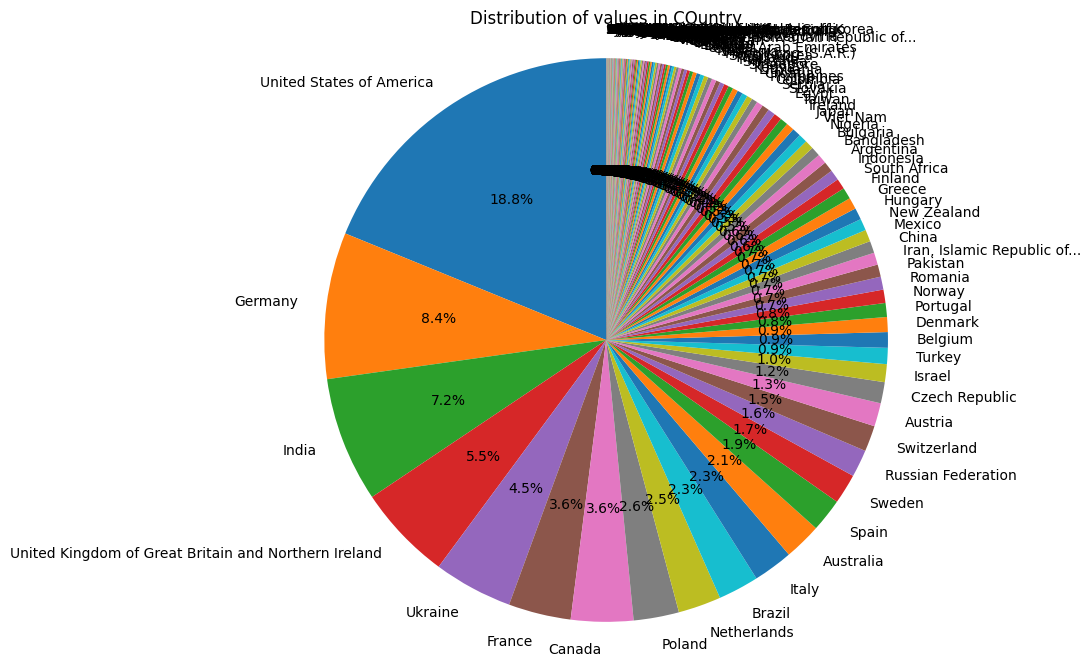

In [10]:
# Write your code here
c_distrib = df["Country"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(c_distrib, labels=c_distrib.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of values in COuntry')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [ ]:
## Write your code here

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [15]:
## Write your code here
df['Employment_onehot'] = pd.get_dummies(df['Employment']).values.tolist()
df['Employment_onehot']

0        [True, False, False, False, False, False, Fals...
1        [True, False, False, False, False, False, Fals...
2        [True, False, False, False, False, False, Fals...
3        [False, False, False, False, False, False, Fal...
4        [False, False, False, False, False, False, Fal...
                               ...                        
65432    [True, False, False, False, False, False, Fals...
65433    [True, False, False, False, False, False, Fals...
65434    [True, False, False, False, False, False, Fals...
65435    [True, False, False, False, False, False, Fals...
65436    [False, False, False, False, False, False, Fal...
Name: Employment_onehot, Length: 65437, dtype: object

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [14]:
## Write your code here
na = df.isna()
na.describe()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437,65437,65437,65437,65437,65437,65437,65437,65437,65437,...,65437,65437,65437,65437,65437,65437,65437,65437,65437,65437
unique,1,1,1,1,2,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,True,True
freq,65437,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,35987,35989,35981,35981,35987,35992,56182,56238,42002,36311


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [19]:
## Write your code here
ConvertedCompYearly_median = df["ConvertedCompYearly"].median()
df["ConvertedCompYearly"].fillna(ConvertedCompYearly_median, inplace=True)

In [21]:
#df["ConvertedCompYearly"].value_counts()

<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [22]:
## Write your code here
RemoteWork_mode = df["RemoteWork"].mode()
df["RemoteWork"].fillna(RemoteWork_mode, inplace=True)
df["RemoteWork"]

/tmp/ipykernel_1222/3839244549.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RemoteWork"].fillna(RemoteWork_mode, inplace=True)


0                                      Remote
1                                      Remote
2                                      Remote
3                                         NaN
4                                         NaN
                         ...                 
65432                                  Remote
65433                                  Remote
65434                               In-person
65435    Hybrid (some remote, some in-person)
65436                                     NaN
Name: RemoteWork, Length: 65437, dtype: object

### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [ ]:
## Write your code here

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [41]:
df['ConvertedCompYearly'].median()

np.float64(65000.0)

In [26]:
## Write your code here
df['ConvertedCompYearly_Log'] = np.log(df['ConvertedCompYearly'] + 1) 
df['ConvertedCompYearly_Log'].value_counts()

ConvertedCompYearly_Log
11.082158    42039
11.073567      321
10.891243      308
11.227707      230
11.361242      226
             ...  
9.181118         1
13.764218        1
10.848346        1
13.011588        1
8.463581         1
Name: count, Length: 6113, dtype: int64

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>

In [35]:
df['YearsCodePro'] = df['YearsCodePro'].replace("More than 50 years", 50)

dtype('O')

In [37]:
df['YearsCodePro'] = df['YearsCodePro'].astype(float)

In [38]:
## Write your code here
#df["YearsCodePro"].value_counts()
bins = [0, 2, 6, 10, np.inf]
# Define the labels for each bin
labels = ['Beginner', 'Junior', 'Mid-Level', 'Senior']
df['Experience_Level'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

In [39]:
df['Experience_Level'].value_counts()

Experience_Level
Senior       21711
Junior       15002
Mid-Level     9402
Beginner      5495
Name: count, dtype: int64

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
